# What is The Perceptron?

## Introduction

### The perceptron is one of the earliest and simplest types of artificial neural networks. Introduced by Frank Rosenblatt in 1958, it was designed to model how the human brain processes information. At its core, the perceptron is a binary classifier, meaning it decides whether an input belonds to one class or another. Despite being basic, it laid the groundwork for more complex neural networks that came later.

## How Does the Perceptron Work?

### A perceptron takes multiple inputs, applies individual weights to each of them, and sums them up. This sum then gets passed through an activation function (usually a step function), that determines the final output (0 or 1). This idea is used to replicate a neuron firing in the brain: if the signal is strong enough, the neuron "fires," otherwise it doesn't.

### The key formula behind the perceptron is:


## Perceptron Architecture

### The basic perceptron consists of:

*   Input layer: takes in the features of the data
*   Weights: adjustable parameters that determine how much influence each input has
*   Bias: helps the model make better predictions by shifting the activation threshold
*   Activation Function: typically a step function that returns 0 or 1, based on the input sum
*   Output: final prediction, either 0 or 1 in binary classification

### This works well for problems that are linearly separable, where a straight line can divide the two classes.



## The Learning Rule

### The perceptron learns through a process called weight adjustment. After each prediction, it checks whether the output was correct. If not, it updates the weights to reduce the error. The update rule is:

### This rule helps the perceptron gradually improve its predictions with each training example.

## Limitations of a Single-Layer Perceptron

### While the perceptron is a good starting point, it has some drawbacks. Most importantly, it can't solve problems that are not linearly separable, like the XOR problem. This means if the data can't be separated by a straight line, the perceptron will fail. To overcome this, multi-layer perceptrons (deep neural networks) were developed.

# Perceptron in Action

In [3]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns=['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

perceptron = Perceptron(max_iter = 1000, random_state = 42)
perceptron.fit(X_train_balanced, y_train_balanced)

y_pred_perceptron = perceptron.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.94815
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18297
           1       0.70      0.68      0.69      1703

    accuracy                           0.95     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.95      0.95      0.95     20000



# Visualizing Results

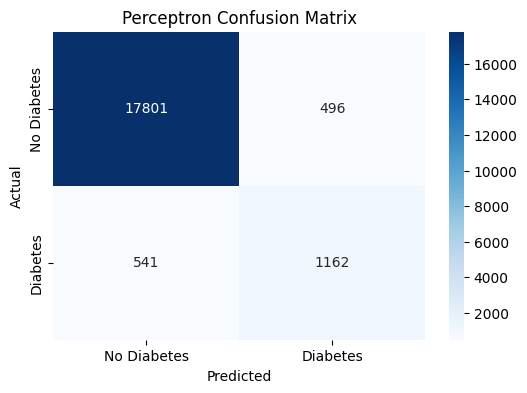

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Perceptron Confusion Matrix')
plt.show()

### This chart shows how well the Perceptron model predicted diabetes.

*   True Positives - 1162 people with diabetes were correctly predicted to have it.
*   True Negatives - 17,801 people without diabetes were correctly predicted to not have it.
*   False Positives - 496 people without diabetes were wrongly predicted to have it.
*   False Negatives - 541 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people without diabetes (97.29% accuracy), but it's less accurate at finding those with diabetes (68.23% accuracy).



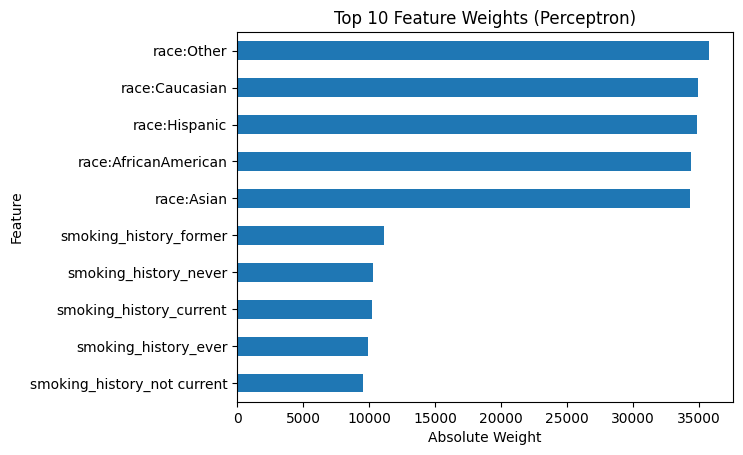

In [6]:
import numpy as np
feature_weights = pd.Series(np.abs(perceptron.coef_[0]), index=X.columns)
feature_weights.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Weights (Perceptron)')
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

### This chart shows which features (data columns) had the most influence on the model's decision.

*   Top Features: Race-related variables (like "race:Other", "race:Asian", etc) had the biggest impact on the model's predictions
*   Smoking history: Different smoking history categories also played a role, but had smaller weights

### According to the Perceptron model, a person's race had a much stronger influence on the diabetes than their smoking history.

